<a href="https://colab.research.google.com/github/aenun111/LeafSense_CapstoneProjectBangkit_ML/blob/main/Initial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os

In [ ]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2.17.1
Num GPUs Available:  1


In [ ]:
!nvidia-smi

Fri Nov 29 16:09:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:



!ls "/content/drive/Shared drives/C242-PS290 Capstone Team Project"


 Brainstorming	'Cloud Computing'  'Machine Learning'  'Mobile Development'   Referensi


In [ ]:
train_data_dir = '/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/DatasetDaunTeh_hasil_Preprocessing2'
test_data_dir = '/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/test'

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 6
EPOCHS = 100
VALIDATION_SPLIT = 0.2

# # Training dataset with validation split
# train_dataset = tf.keras.utils.image_dataset_from_directory(
#     train_data_dir,
#     image_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     label_mode='categorical',
#     validation_split=VALIDATION_SPLIT,
#     subset='training',
#     seed=42
# )

# # Validation dataset with validation split
# validation_dataset = tf.keras.utils.image_dataset_from_directory(
#     train_data_dir,
#     image_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     label_mode='categorical',
#     validation_split=VALIDATION_SPLIT,
#     subset='validation',
#     seed=42
# )

# Training dataset (no split needed here)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

# Test dataset (no split needed here)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,          # Add some augmentation to prevent overfitting
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     fill_mode='reflect',
#     validation_split=0.2
# )

# test_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,          # Add some augmentation to prevent overfitting
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     fill_mode='reflect'
# )

# # Training generator
# train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     subset='training',  # Training subset
#     shuffle=42
# )

# # Validation generator
# validation_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,  # Keep the same batch size for consistency
#     class_mode='categorical',
#     subset='validation',  # Validation subset
#     shuffle=42
# )

# # Test generator
# test_generator = test_datagen.flow_from_directory(
#     test_data_dir,
#     target_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     shuffle=False
# )

Found 5281 files belonging to 6 classes.
Found 586 files belonging to 6 classes.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_names = train_dataset.class_names
class_counts = {class_name: 0 for class_name in class_names}

# Iterate through the training dataset
for images, labels in train_dataset:
    for label in labels.numpy():
        class_index = np.argmax(label)
        class_name = class_names[class_index]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

# Optional: Visualize class frequencies
classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10, 5))
plt.bar(classes, counts)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Class Distribution in Training Dataset")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# # Iterate through the training dataset
# for images, labels in validation_dataset:
#     for label in labels.numpy():
#         class_index = np.argmax(label)
#         class_name = class_names[class_index]
#         class_counts[class_name] = class_counts.get(class_name, 0) + 1

# # Optional: Visualize class frequencies
# classes = list(class_counts.keys())
# counts = list(class_counts.values())

# plt.figure(figsize=(10, 5))
# plt.bar(classes, counts)
# plt.xlabel("Classes")
# plt.ylabel("Frequency")
# plt.title("Class Distribution in Training Dataset")
# plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()


class_names = train_dataset.class_names
class_counts = {class_name: 0 for class_name in class_names}


# Iterate through the test dataset
for images, labels in test_dataset:
    for label in labels.numpy():
        class_index = np.argmax(label)
        class_name = class_names[class_index]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

# Optional: Visualize class frequencies
classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10, 5))
plt.bar(classes, counts)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Class Distribution in Test Dataset")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

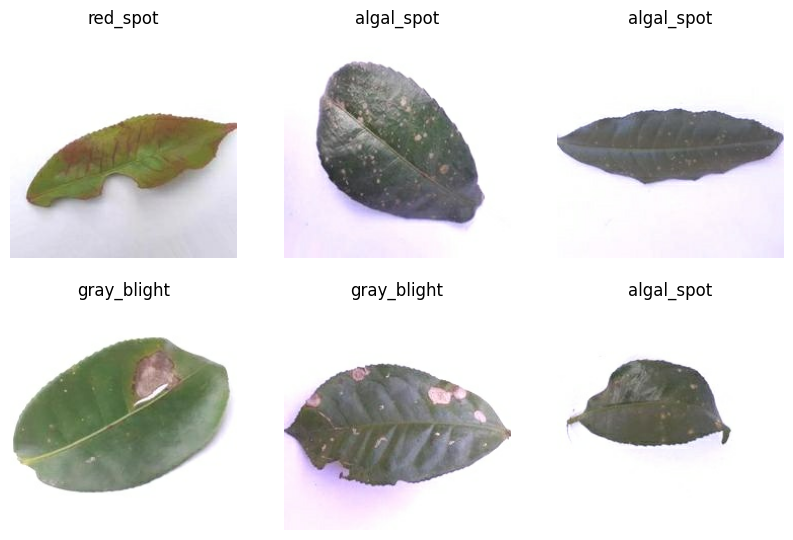

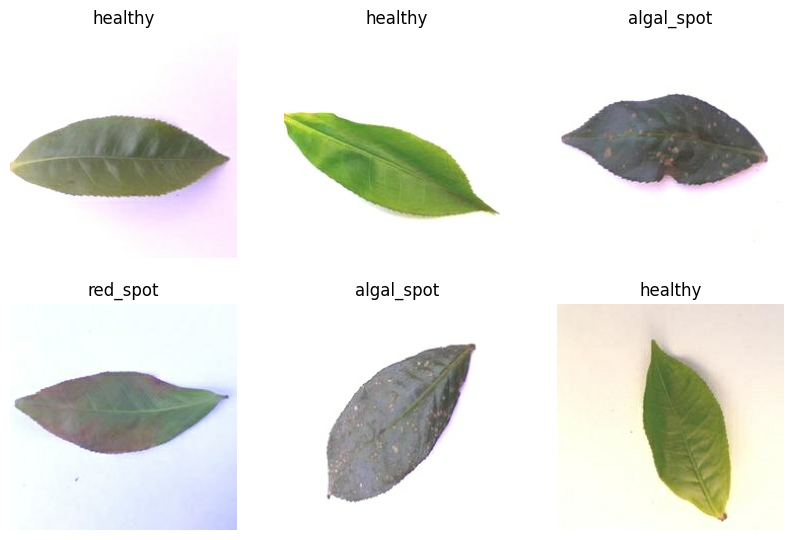

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the training dataset
image_batch, label_batch = next(iter(train_dataset))

# Create a subplot with 5x5 images
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(train_dataset.class_names[tf.argmax(label_batch[i]).numpy()])
    plt.axis("off")

plt.show()
print()

# # Get a batch of images and labels from the validation dataset
# image_batch, label_batch = next(iter(validation_dataset))

# # Create a subplot with 5x5 images
# plt.figure(figsize=(10, 10))
# for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(image_batch[i].numpy().astype("uint8"))
#     plt.title(train_dataset.class_names[tf.argmax(label_batch[i]).numpy()])
#     plt.axis("off")

# plt.show()
# print()

# Get a batch of images and labels from the test dataset
image_batch, label_batch = next(iter(test_dataset))

# Create a subplot with 5x5 images
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(train_dataset.class_names[tf.argmax(label_batch[i]).numpy()])
    plt.axis("off")

plt.show()

In [ ]:
# Check the shapes of labels in your datasets
for images, labels in train_dataset:
    print("Train labels shape:", labels.shape)
    break

for images, labels in test_dataset:
    print("Test labels shape:", labels.shape)
    break

Train labels shape: (32, 6)
Test labels shape: (32, 6)


In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import F1Score

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Fine-tuning: Make the 12th last layer trainable
for layer in base_model.layers[:-10]:
    layer.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True
# base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)

# First dense layer with L2
x = Dense(1024,
          activation='relu',
          kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)

# Second dense layer with L2
x = Dense(256,
          activation='relu',
          kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)

x = BatchNormalization()(x)

# Output layer with lighter L2
predictions = Dense(NUM_CLASSES,
                   activation='softmax',
                   kernel_regularizer=l2(1e-5))(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy', F1Score(average='macro')])

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,950,854 (98.99 MB)

 Trainable params: 6,828,294 (26.05 MB)

 Non-trainable params: 19,122,560 (72.95 MB)

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.5,          # Factor to reduce the learning rate
    patience=3,          # Number of epochs with no improvement
    min_lr=1e-7,         # Minimum learning rate
    verbose=1            # Verbosity
)

In [ ]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=test_dataset,
    callbacks=[reduce_lr]
)

Epoch 1/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 51s 211ms/step - accuracy: 0.2252 - f1_score: 0.2234 - loss: 2.4065 - val_accuracy: 0.6741 - val_f1_score: 0.6672 - val_loss: 1.2002 - learning_rate: 2.0000e-05
Epoch 2/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.5036 - f1_score: 0.4970 - loss: 1.5378 - val_accuracy: 0.7696 - val_f1_score: 0.7648 - val_loss: 0.8771 - learning_rate: 2.0000e-05
Epoch 3/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 42s 128ms/step - accuracy: 0.6506 - f1_score: 0.6460 - loss: 1.1373 - val_accuracy: 0.8055 - val_f1_score: 0.8015 - val_loss: 0.7389 - learning_rate: 2.0000e-05
Epoch 4/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.7482 - f1_score: 0.7462 - loss: 0.9099 - val_accuracy: 0.8362 - val_f1_score: 0.8343 - val_loss: 0.6236 - learning_rate: 2.0000e-05
Epoch 5/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - accuracy: 0.7913 - f1_score: 0.7897 - loss: 0.7768 - val_accuracy: 0.8618 - val_f1_score: 0.8604 - val_loss: 0.5583 - learning_rate: 2.0000

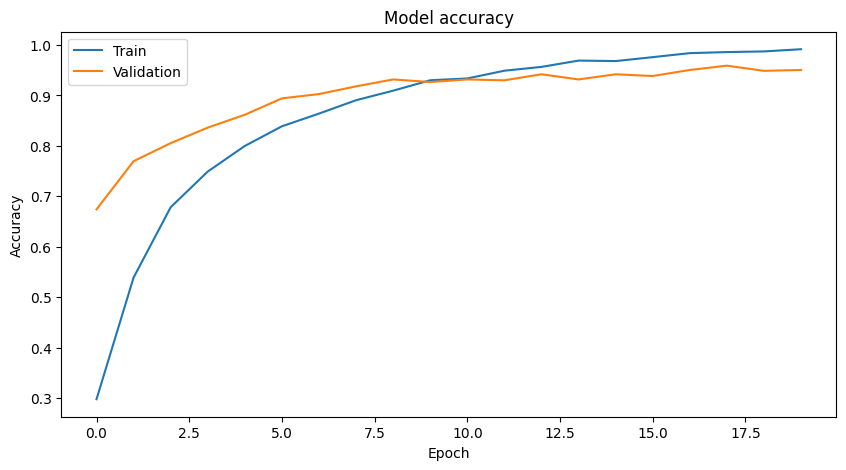

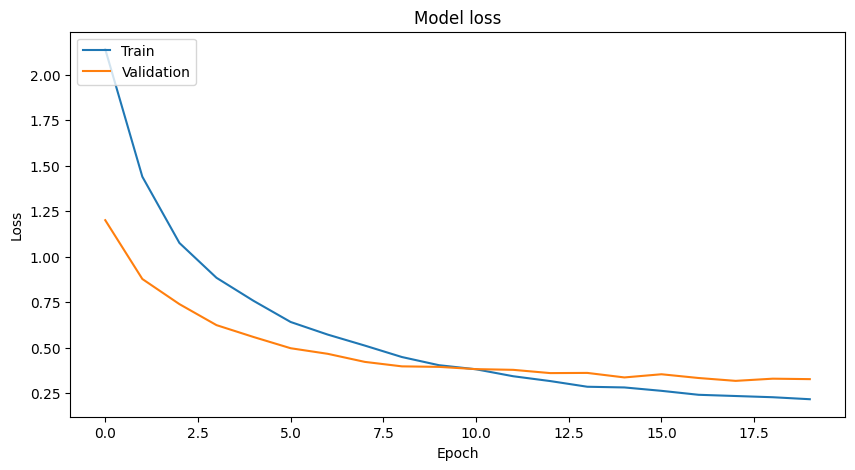

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np

In [ ]:
# Get the class names
class_names = train_dataset.class_names

# Initialize dictionaries to track total instances and false predictions for each class
total_instance = {class_name: 0 for class_name in class_names}
false_predictions = {class_name: 0 for class_name in class_names}

# Assuming you have a trained model
for images, labels in test_dataset:
    # Predict the class probabilities
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels.numpy(), axis=1)

    # Update total instances and false predictions
    for true_class, predicted_class in zip(true_classes, predicted_classes):
        true_class_name = class_names[true_class]
        total_instance[true_class_name] += 1
        if true_class != predicted_class:
            false_predictions[true_class_name] += 1

# Print the frequency of false predictions for each class
print("Class-wise False Predictions:")
for class_name in class_names:
    total = total_instance[class_name]
    false = false_predictions[class_name]
    print(f"Class: {class_name}, False Predictions: {false}, Total Instances: {total}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Class-wise False Predictions:
Class: algal_spot, False Predictions: 1, Total Instances: 100
Class: brown_blight, False Predictions: 8, Total Instances: 86
Class: gray_blight, False Predictions: 4, Total Instances: 100
Class: healthy, False Predictions: 6, Total Instances: 100
Class

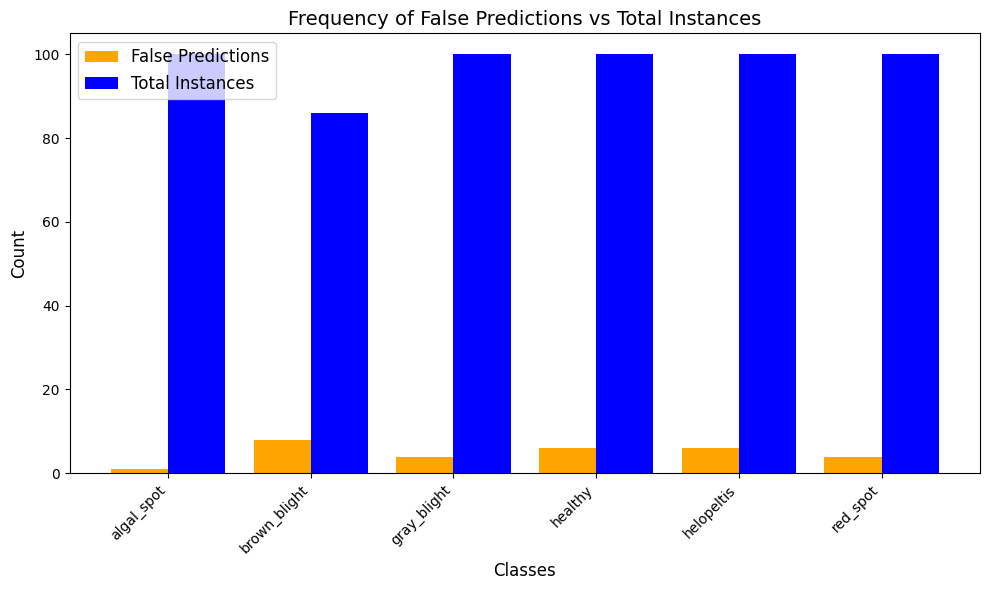

In [ ]:
# Extract data for plotting
classes = list(class_names)
false_counts = [false_predictions[class_name] for class_name in classes]
total_counts = [total_instance[class_name] for class_name in classes]

# Plot the data
x = np.arange(len(classes))  # X-axis positions for each class
width = 0.4  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width / 2, false_counts, width, label='False Predictions', color='orange')
ax.bar(x + width / 2, total_counts, width, label='Total Instances', color='blue')

# Add labels, title, and legend
ax.set_xlabel('Classes', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Frequency of False Predictions vs Total Instances', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


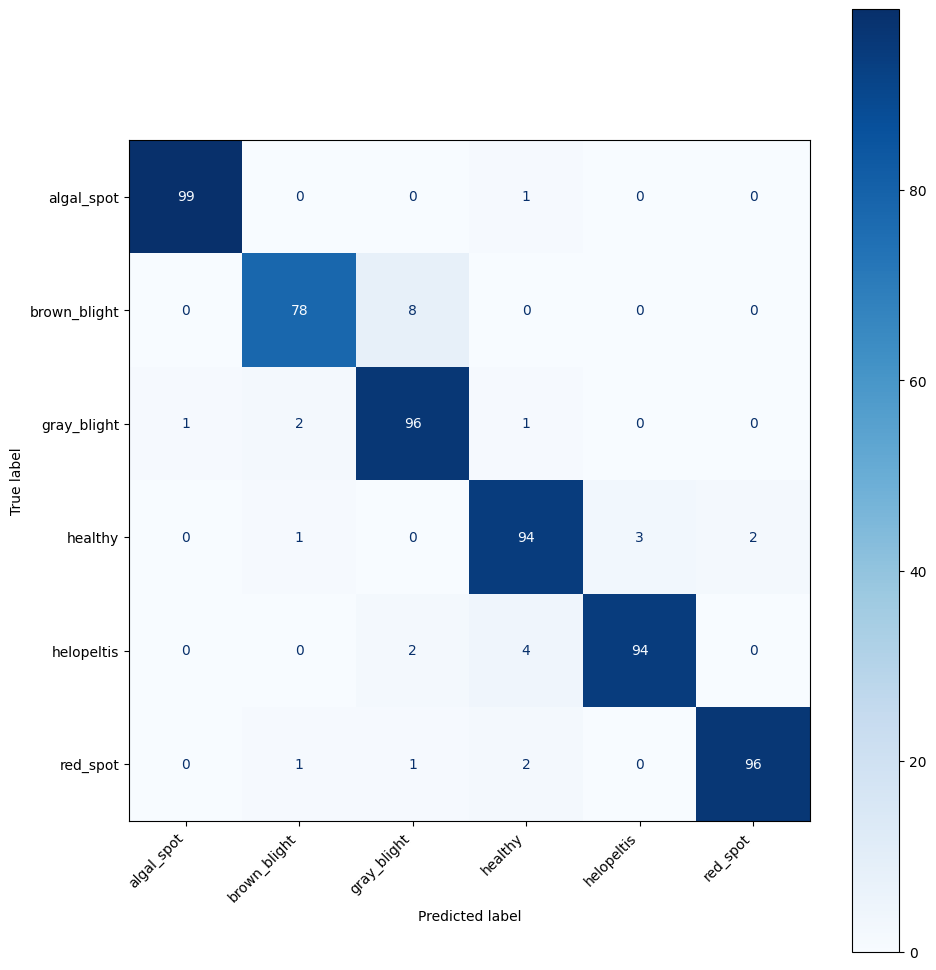

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have 'test_dataset' and a trained 'model'
# and the 'class_names' variable defined as before

# Collect true and predicted labels
y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels.numpy(), axis=1)
    y_true.extend(true_classes)
    y_pred.extend(predicted_classes)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create the confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figure size as needed
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


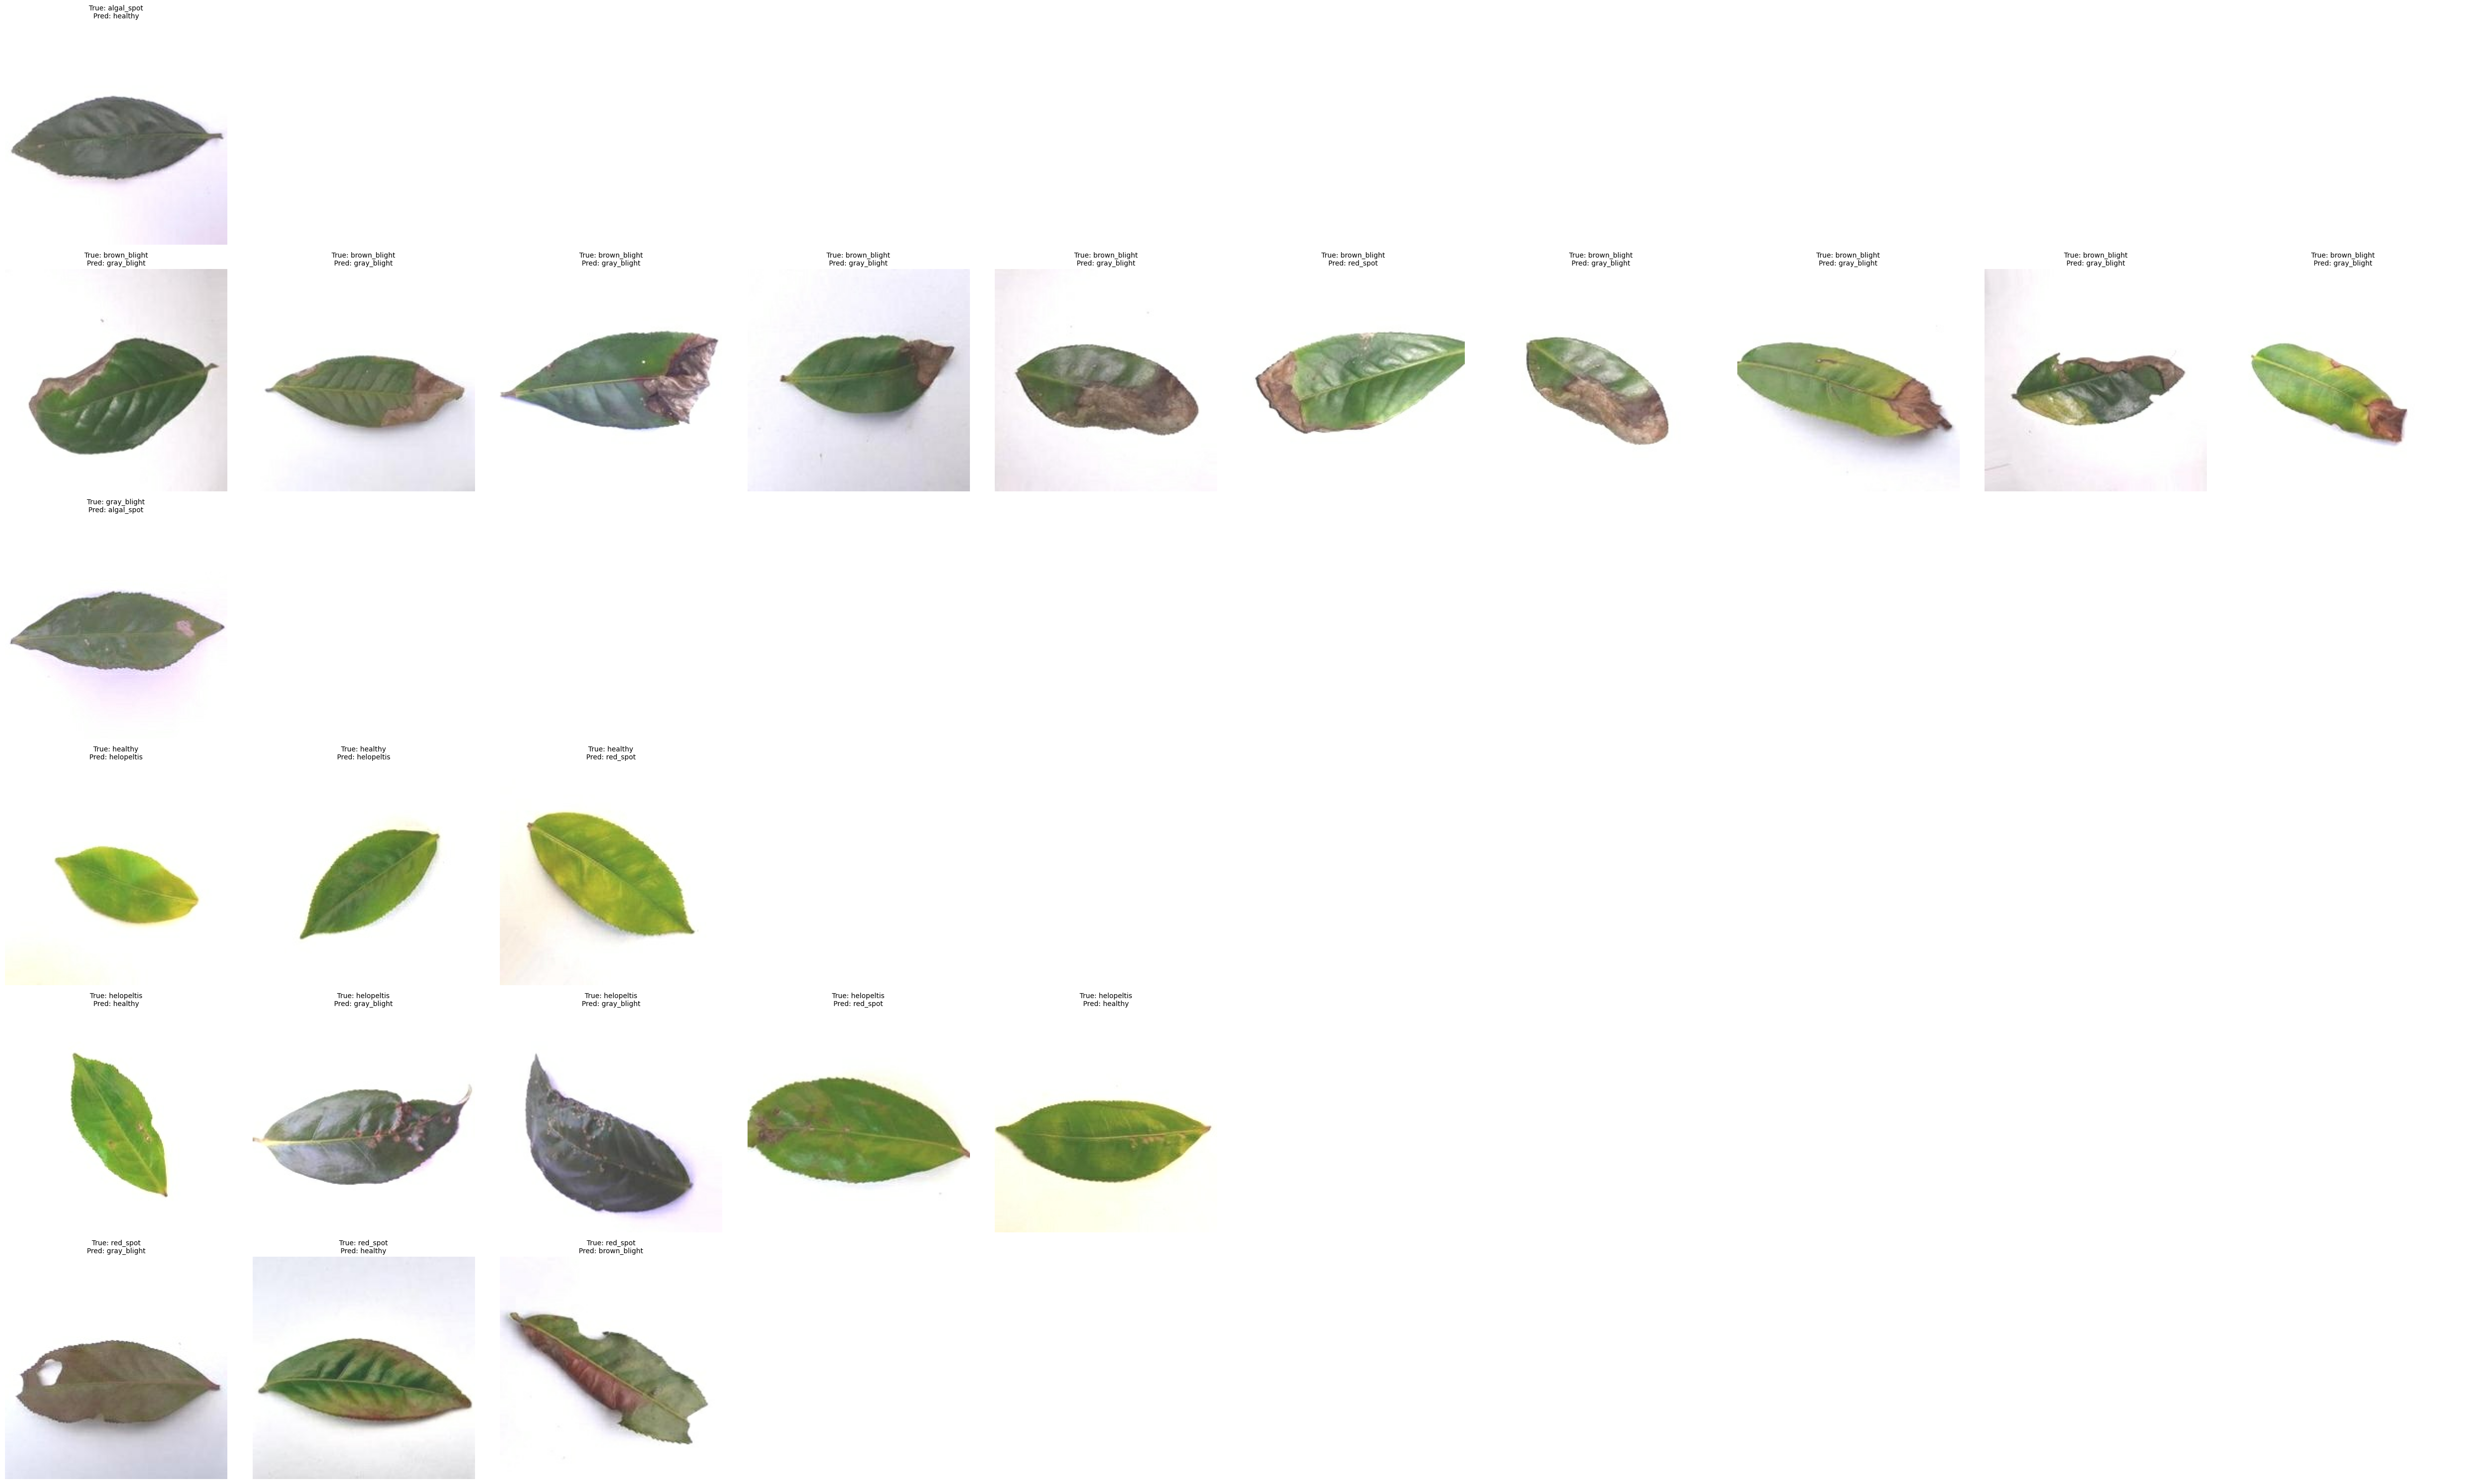

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the class names
class_names = train_dataset.class_names

# Dictionary to store wrongly classified samples for each class
wrongly_classified = {class_name: [] for class_name in class_names}

# Assuming you have a trained model
for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels.numpy(), axis=1)

    # Identify wrongly classified samples and store them
    for i, (true_class, predicted_class) in enumerate(zip(true_classes, predicted_classes)):
        if true_class != predicted_class:
            true_class_name = class_names[true_class]
            wrongly_classified[true_class_name].append((images[i], class_names[predicted_class]))

# Display the first few wrongly classified images for each class
num_samples_to_show = 10  # Number of images to display per class

fig, axes = plt.subplots(len(class_names), num_samples_to_show, figsize=(5*num_samples_to_show, 5 * len(class_names)))
if len(class_names) == 1:  # Handle the case where there's only one class
    axes = [axes]

for i, class_name in enumerate(class_names):
    wrong_samples = wrongly_classified[class_name]
    for j in range(num_samples_to_show):
        ax = axes[i][j] if len(class_names) > 1 else axes[j]
        if j < len(wrong_samples):
            image, predicted_label = wrong_samples[j]
            ax.imshow(image.numpy().astype("uint8"))  # Convert to a displayable format
            ax.set_title(f"True: {class_name}\nPred: {predicted_label}", fontsize=10)
            ax.axis('off')
        else:
            ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.show()
